# Predicting Sale Prices for Ames, IA Housing Dataset

#### By: _Leticia G._

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df_train = pd.read_csv("./datasets/train.csv")
df_test  = pd.read_csv("./datasets/test.csv")

## Quick check of the data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
print(df_test.shape)
print(df_train.shape)

(878, 80)
(2051, 81)


In [5]:
# It's the dependent - 'SalePrice'
set(df_train) - set(df_test)

{'SalePrice'}

In [6]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


# Data Cleaning

# What factors do I think would effect house price? + outside research

Off the top of my head the most important factors when it comes to buying a house wouild be the size of the house, where is the house located (nice area vs bad area, school area, close to work etc - neighborhood variable), how many beds and bath, year built, house style (aesthetic), garage (88% of Americans have access to a car - Pew Research Center 2015), and yard size.

Special features like: paved driveway (alley variable), pool, backyard, ac unit/heating, basement, fireplace.
Condition and quality of the house, garage, kitchen, fireplace, garage.

However, let's see if these features have nulls and how many homes may not contain these features.

# Outside data
https://www.homelight.com/blog/does-a-paved-driveway-add-value-to-your-home/
https://www.ortalheat.com/blog/which-features-do-americans-want-in-their-dream-home-hint-a-fireplace-is-on-the-list
https://eyeonhousing.org/2019/09/share-of-new-homes-with-fireplaces-drops-to-record-low/

In [10]:
# Set the ID column to index for both train and test

df_train.set_index('Id', inplace=True)

In [11]:
df_test.set_index('Id', inplace=True)

In [12]:
print(df_train.shape)
print(df_test.shape)

(2051, 80)
(878, 79)


In [13]:
df_train.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Year Built           0
dtype: int64

It looks like more than 50% of the homes in the dataset do not contain a pool, alley, fence, or specify the quality of the fireplace. These might skew our model so let's fix all the nulls and choose other criteria.

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

MS SubClass isn't really a numerical integer; it's representative of the house stories so it should be changed to string instead.
PID, Year Built, Year Remod/Add, and Yr Sold as well.

In [15]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype(str)

In [16]:
df_test['MS SubClass'] = df_test['MS SubClass'].astype(str)

In [17]:
df_train['PID'] = df_train['PID'].astype(str)

In [19]:
df_test['PID'] = df_test['PID'].astype(str)

In [20]:
df_train['Year Built'] = df_train['Year Built'].astype(str)

In [21]:
df_test['Year Built'] = df_test['Year Built'].astype(str)

In [22]:
df_train['Year Remod/Add'] = df_train['Year Remod/Add'].astype(str)

In [23]:
df_test['Year Remod/Add'] = df_test['Year Remod/Add'].astype(str)

In [24]:
df_train['Yr Sold'] = df_train['Yr Sold'].astype(str)

In [25]:
df_test['Yr Sold'] = df_test['Yr Sold'].astype(str)

#### String - None
Pool QC, Misc Feature, Alley, Fence, Fireplace Qu, Garage Qual, Garage Finish, Garage Cond, Garage Type, Bsmt Exposure,BsmtFin Type 2,Bsmt Cond, Bsmt Qual,BsmtFin Type 1,Mas Vnr Type
#### Integers - 0
Lot Frontage, , Mas Vnr Area , Garage Area, Total Bsmt SF,Bsmt Unf SF, BsmtFin SF 1, BsmtFin SF 2, Garage Yr Blt, Bsmt Half Bath, Bsmt Full Bath, Garage Cars

In [26]:
# Filling String Values for Train
# Code from https://stackoverflow.com/questions/36556256/how-do-i-fill-na-values-in-multiple-columns-in-pandas

df_train.update(df_train[['Pool QC','Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Qual', 'Garage Finish', 'Garage Cond', 'Garage Type', 'Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1', 'Mas Vnr Type']].fillna("None"))

In [27]:
# Filling Integer Values for Train
df_train.update(df_train[['Lot Frontage', 'Mas Vnr Area', 'Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Yr Blt', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Cars']].fillna(0))

In [28]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

SalePrice         0
Sale Type         0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Year Remod/Add    0
dtype: int64

In [29]:
df_test.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 2     25
Mas Vnr Area        1
Electrical          1
Mas Vnr Type        1
Year Built          0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
dtype: int64

In [30]:
df_test['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [31]:
# Filling String Values for Test
df_test.update(df_test[['Pool QC','Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Qual', 'Garage Finish', 'Garage Cond', 'Garage Type', 'Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1', 'Mas Vnr Type', 'Electrical']].fillna("None"))

In [32]:
# Filling Integer Values for Test
df_test.update(df_test[['Lot Frontage', 'Mas Vnr Area', 'Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Yr Blt', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Cars']].fillna(0))

In [33]:
df_test.isnull().sum().sort_values(ascending=False).head()

Sale Type       0
Exter Cond      0
Roof Style      0
Roof Matl       0
Exterior 1st    0
dtype: int64

In [34]:
df_train.shape

(2051, 80)

In [35]:
df_test.shape

(878, 79)

In [36]:
#Unsure if this would interfere with kaggle submissions so left as is.

#df_train.columns=df_train.columns.str.replace(' ', '_')
#df_test.columns=df_test.columns.str.replace(' ', '_')

# EDA (Explarotory Data Analysis)

In [37]:
df_train.describe(include='all')

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
count,2051,2051,2051,2051.000000,2051.000000,2051,2051,2051,2051,2051,...,2051.000000,2051.000000,2051,2051,2051,2051.000000,2051.000000,2051,2051,2051.000000
unique,2051,16,7,NaN,NaN,2,3,4,4,3,...,NaN,NaN,5,5,6,NaN,NaN,5,9,NaN
top,527105050,20,RL,NaN,NaN,Pave,None,Reg,Lvl,AllPub,...,NaN,NaN,None,None,None,NaN,NaN,2007,WD,NaN
freq,1,770,1598,NaN,NaN,2044,1911,1295,1843,2049,...,NaN,NaN,2042,1651,1986,NaN,NaN,498,1781,NaN
mean,NaN,NaN,NaN,57.944417,10065.208191,NaN,NaN,NaN,NaN,NaN,...,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,NaN,NaN,181469.701609
std,NaN,NaN,NaN,33.137332,6742.488909,NaN,NaN,NaN,NaN,NaN,...,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,NaN,NaN,79258.659352
min,NaN,NaN,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,12789.000000
25%,NaN,NaN,NaN,43.500000,7500.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,NaN,NaN,129825.000000
50%,NaN,NaN,NaN,63.000000,9430.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,NaN,NaN,162500.000000
75%,NaN,NaN,NaN,78.000000,11513.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,NaN,NaN,214000.000000


# Frequency Dist


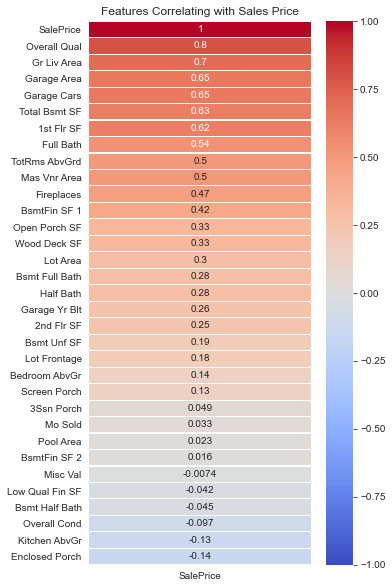

In [38]:
plt.figure(figsize = (5,10))

corr = df_train.corr()
plt.title('Features Correlating with Sales Price')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            cmap = "coolwarm", annot = True,
            vmin = -1, vmax = 1, linewidth = 0.1);

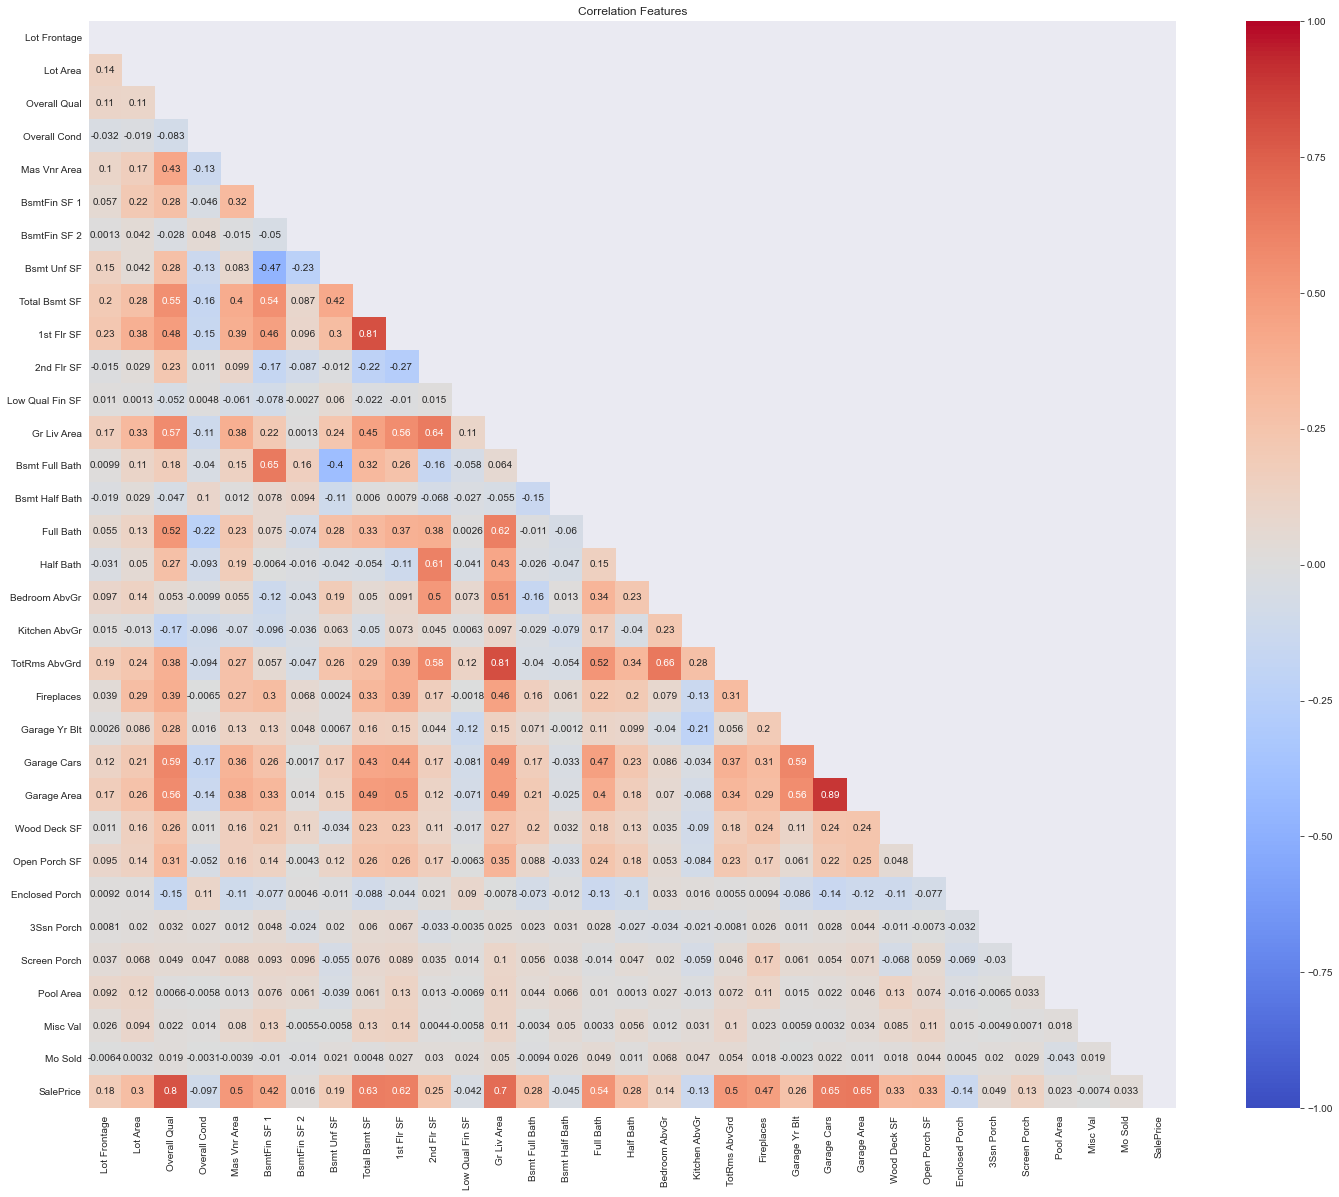

In [39]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, square = True, mask = mask,
            vmin = -1, vmax = 1, )
plt.title('Correlation Features');

In [40]:
# Overal qual (.8), gr liv area (.72), tot bsmt sf (.67) is highly correlated so sales price 
# Garage Cars and Garage Area are highly multicorrelated. (.9)
# Gr Liv Area and Total Rms AbvGrd are highly multicorrelated (.81)
# 1st Fl SF and total basmt sf share a high (.81) correlation.

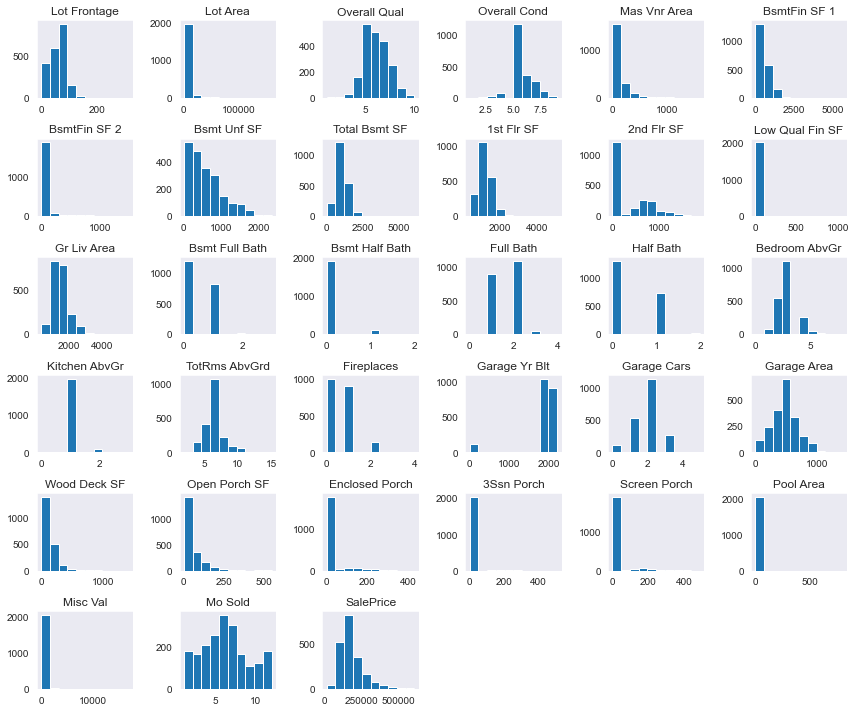

In [41]:
# Histogram of Numeric Columns
df_train.hist(figsize=(12,10), grid=False );
plt.tight_layout() 

<Figure size 2160x1440 with 0 Axes>

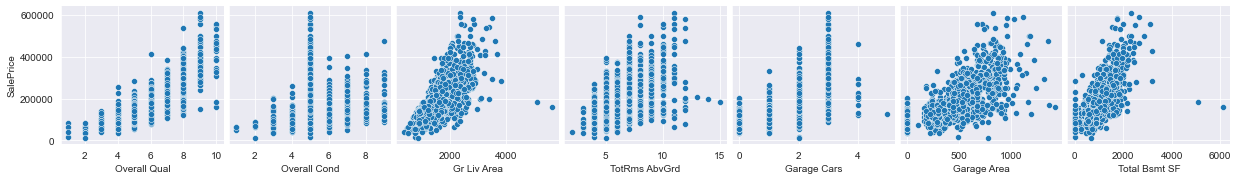

In [42]:
plt.figure(figsize = (30,20))
sns.pairplot(df_train, x_vars = ["Overall Qual", "Overall Cond", "Gr Liv Area", "TotRms AbvGrd", "Garage Cars", "Garage Area", "Total Bsmt SF"], y_vars = ["SalePrice"], diag_kind = None);

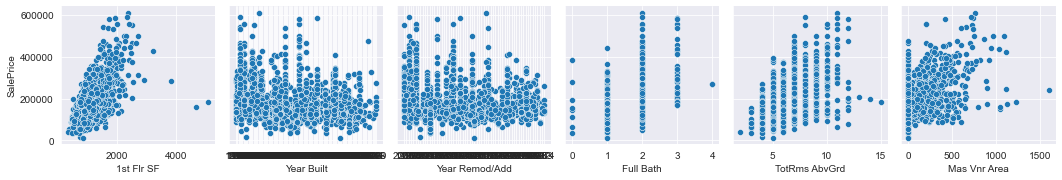

In [43]:
sns.pairplot(df_train, x_vars = ["1st Flr SF", "Year Built", "Year Remod/Add", "Full Bath", "TotRms AbvGrd", "Mas Vnr Area"], y_vars = ["SalePrice"], diag_kind = None);

In [44]:
# As Overall Quality of the house increases, so does the Sale Price. It seems to have a direct linear relationship.
# Overall Cond seems to follow a slight normal distribution with the highest number of obervations lying in the middle 
# *Gr Liv Area: 2-3 outliers after 4000 - linear relationship as well
# *TotRms AbcGrd has 2 outliers (15, 14 rms)
# *Garage Cars had the most expensive sale price around garage holding 3 cars. The 5 car observation could be an outlier.
# *Garage Area has two potential outliers near the lower price of house - check values individually .loc
# *Total Basmt SF has two outliers - use .loc - log maybe?
# *1st Flr Sf Has a liniear relationship as well, and contain 3 outliers
# *Year Built has no linear relationshipo to sales price, but the most expensive homes were built after 2000's. check out house price to 1900 greater than 400K - outlier
# The full bath plot does not tell us much about price 
# *nor TotRms Abv Grd (which has outliers)
# Mas Vnr Area has many 0's, an outlier, and does not have a linear relationship to Sales Price.

# Remove Outliers

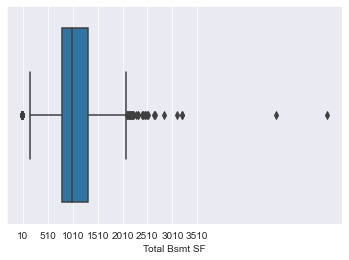

In [45]:
sns.boxplot(x=df_train['Total Bsmt SF']);
plt.xticks(range(10,4000,500));

In [46]:
#df_train.loc[(df_train['Total Bsmt SF'] > 4000)].T.head()
df_train.loc[(df_train['Total Bsmt SF'] > 4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,480,Gd,None,None,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,0,0,None,None,Elev,17000,10,2007,New,183850


In [47]:
df_train.loc[(df_train['Gr Liv Area'] > 4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,480,Gd,None,None,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,0,0,None,None,Elev,17000,10,2007,New,183850


In [48]:
df_train.loc[(df_train['TotRms AbvGrd'] > 12)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2195,909176080,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,0,None,None,None,0,3,2007,WD,200000
926,909279010,90,RL,0.0,8145,Pave,None,IR1,HLS,AllPub,...,0,0,None,None,None,0,7,2009,WD,205000
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,0,0,None,None,Elev,17000,10,2007,New,183850


In [49]:
df_train.loc[(df_train['Garage Cars'] == 5)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
747,903236040,30,RM,50.0,8635,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2009,WD,126500


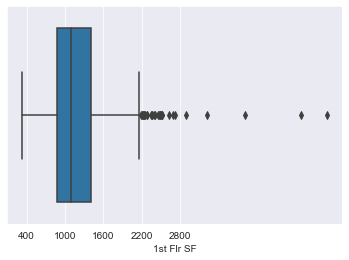

In [50]:
sns.boxplot(x=df_train['1st Flr SF']);
plt.xticks(range(400,3000,600));

In [51]:
df_train.loc[(df_train['1st Flr SF'] > 3000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1773,528366050,20,RL,0.0,12692,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,430000
1498,908154080,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,7,2008,WD,284700
1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,480,Gd,None,None,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,0,0,None,None,Elev,17000,10,2007,New,183850


In [52]:
df_train.loc[(df_train['Full Bath'] ==4)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
816,906230010,90,RL,0.0,11855,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,10,2009,WD,269500
817,906230020,90,RL,0.0,7939,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,10,2009,WD,269500


In [53]:
df_train.loc[(df_train['Mas Vnr Area'] > 1500)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1850,533241030,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,198,0,None,None,None,0,6,2007,WD,239000


In [54]:
# Reoccuring outliers in mulitple categories include IDs 2181 and 1499

In [55]:
df_train.drop(index=2181, axis=0, inplace=True)
df_train.drop(index=1499, axis=0, inplace=True)
df_train.drop(index=2195, axis=0, inplace=True)
df_train.drop(index=926, axis=0, inplace=True)
df_train.drop(index=747, axis=0, inplace=True)
df_train.drop(index=1773, axis=0, inplace=True)
df_train.drop(index=1498, axis=0, inplace=True)
df_train.drop(index=816, axis=0, inplace=True)
df_train.drop(index=817, axis=0, inplace=True)
df_train.drop(index=1850, axis=0, inplace=True)


# Dummy Code

In [56]:
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")
ohe.fit(df_train[['Neighborhood']])

## Transform both training and testing data using the fit OneHotEncoder
train_dummies = pd.DataFrame(ohe.transform(df_train[['Neighborhood']]),
                             columns = ohe.get_feature_names(), index = df_train.index)

test_dummies  = pd.DataFrame(ohe.transform(df_test[["Neighborhood"]]),
                             columns = ohe.get_feature_names(), index = df_test.index)

## Check the shape of both dummy dataframes - still needs to be dropped which we can do manually 
print(train_dummies.shape)
print(test_dummies.shape)

(2041, 28)
(878, 28)


In [57]:
train_dummies.columns

Index(['x0_Blmngtn', 'x0_Blueste', 'x0_BrDale', 'x0_BrkSide', 'x0_ClearCr',
       'x0_CollgCr', 'x0_Crawfor', 'x0_Edwards', 'x0_Gilbert', 'x0_Greens',
       'x0_GrnHill', 'x0_IDOTRR', 'x0_Landmrk', 'x0_MeadowV', 'x0_Mitchel',
       'x0_NAmes', 'x0_NPkVill', 'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt',
       'x0_OldTown', 'x0_SWISU', 'x0_Sawyer', 'x0_SawyerW', 'x0_Somerst',
       'x0_StoneBr', 'x0_Timber', 'x0_Veenker'],
      dtype='object')

In [58]:
train_dummies.drop(columns="x0_Blmngtn", inplace=True)
test_dummies.drop(columns="x0_Blmngtn", inplace=True)

In [59]:
## Join the train and test dummy columns back with the original dataframes
df_train_full = df_train.join(train_dummies)
df_test_full = df_test.join(test_dummies)

## Check the shapes are the same (except for the SalePrice column in train)
print(df_test_full.shape)
print(df_train_full.shape)

(878, 106)
(2041, 107)


In [60]:
set(train_dummies)-set(test_dummies)

set()

In [61]:
## Check that all the columns are in the same order
(df_train_full.drop(columns='SalePrice').columns == df_test_full.columns).all()

True

## Define Your Variables and Model

In [62]:
# Overall Qual - categorical - ordinal
# Neighborhood - categorical - nominal 
# GrLiv Area
# Garage Area
# Total Bsmt SF

# not used
# 1ST FLR SF

# Overal qual (.8), gr liv area (.72), tot bsmt sf (.67) is highly correlated to sales price 
# Garage Cars and Garage Area are highly multicorrelated. (.9)
# Gr Liv Area and Total Rms AbvGrd are highly multicorrelated (.81)
# 1st Fl SF and total bsmt sf share a high (.81) correlation.

In [63]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
#features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']

features.extend(train_dummies.columns)

In [78]:
X.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,...,x0_NoRidge,x0_NridgHt,x0_OldTown,x0_SWISU,x0_Sawyer,x0_SawyerW,x0_Somerst,x0_StoneBr,x0_Timber,x0_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,6,1479,475.0,725.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
544,7,2122,559.0,913.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
153,5,1057,246.0,1057.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,5,1444,400.0,384.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255,6,1445,484.0,676.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
# Define your X and Y
X = df_train_full[features]
y = df_train_full['SalePrice']

In [81]:
## Train Test Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=42)

In [82]:
X_train.shape, X_test.shape

((1530, 31), (511, 31))

## Baseline Model

In [83]:
y_test_baseline=[y_train.mean()]*len(y_test)

In [84]:
#RMSE
mean_squared_error(y_test, y_test_baseline)**.5

#Our prediction is off by $78375 - we get it by unit (dollar) becayuse of rmse

80781.4887198706

## Linear Regression

In [153]:
## Instantiate and fit a linear regression model to your training data
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [154]:
## Evaluate model on both training and testing data using RMSE
print(f'Train RMSE: {mean_squared_error(y_train, lr.predict(X_train), squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, lr.predict(X_test), squared=False)}')

# doing a lil worse on test which is normal.
# Off by $ 38504.240972806205 in train
# off by $42304.93142430701 on test. 

Train RMSE: 30745.060588189262
Test RMSE: 31745.209421088344


In [155]:
## Let's check the coefficients in an interpretable way
coef_df=pd.DataFrame({
    "coef": lr.coef_
}, index=X.columns)

coef_df.head(10)

,coef
Overall Qual,16412.776664
Gr Liv Area,52.739976
Garage Area,43.218535
Total Bsmt SF,34.230314
x0_Blueste,-19223.880451
x0_BrDale,-18495.319948
x0_BrkSide,-7678.264529
x0_ClearCr,14567.041050
x0_CollgCr,10521.607313
x0_Crawfor,17138.945860


In [1]:
## Make a bar chart to visualize coefficients
coef_df.plot(kind='barh', figsize= (10,8));

NameError: name 'coef_df' is not defined

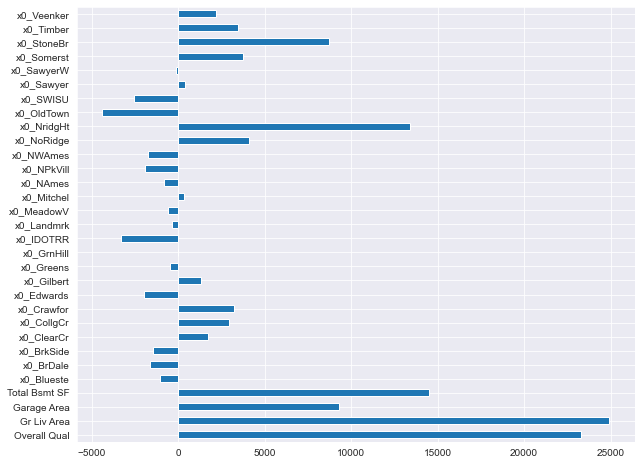

In [126]:
coef_df['normalized_coef'] = coef_df['coef']*X_train.std()
coef_df['normalized_coef'].plot(kind='barh', figsize= (10,8));

In [127]:
# Normalizing the coefficients allows for better comparison on how the coefficients effect SalePrice. Rather than reading the units effect to why it because std from the price.

## Make Predictions

In [128]:
## First we subset `df_test_full` to just the features we included in our model
# submitting all rows:, only feature columns model was trained on
X_kaggle = df_test_full.loc[:,features]

## Then we use the same model to predict on the test data, and save predictions to a `SalePrice` column
X_kaggle['SalePrice'] = lr.predict(X_kaggle)
X_kaggle.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,...,x0_NridgHt,x0_OldTown,x0_SWISU,x0_Sawyer,x0_SawyerW,x0_Somerst,x0_StoneBr,x0_Timber,x0_Veenker,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,6,1928,440,1020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178124.595937
2718,5,1967,580,1967,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,220423.353607
2414,7,1496,426,654,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180775.573050
1989,5,968,480,968,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111030.207252
625,6,1394,514,1394,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180170.116693


In [129]:
## Set output to be a dataframe with only the `SalePrice` column
output = X_kaggle[['SalePrice']]

In [130]:
output.to_csv("./datasets/first_submission.csv")
# 32630.53125 RMSE on kaggle

In [131]:
output.shape

(878, 1)

In [132]:
X.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF',
       'x0_Blueste', 'x0_BrDale', 'x0_BrkSide', 'x0_ClearCr', 'x0_CollgCr',
       'x0_Crawfor', 'x0_Edwards', 'x0_Gilbert', 'x0_Greens', 'x0_GrnHill',
       'x0_IDOTRR', 'x0_Landmrk', 'x0_MeadowV', 'x0_Mitchel', 'x0_NAmes',
       'x0_NPkVill', 'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt', 'x0_OldTown',
       'x0_SWISU', 'x0_Sawyer', 'x0_SawyerW', 'x0_Somerst', 'x0_StoneBr',
       'x0_Timber', 'x0_Veenker'],
      dtype='object')

## Second Submission - Refit Model on Entire Training Data

In [133]:
lr = LinearRegression()
cross_val_score(lr, X, y)

array([0.82923758, 0.86452279, 0.8524961 , 0.84268153, 0.83437296])

In [134]:
cross_val_score(lr, X, y, scoring = "neg_root_mean_squared_error").mean()*-1

31135.55466765929

In [135]:
## Then we can fit the model to the whole training dataset
lr.fit(X,y)

LinearRegression()

In [136]:
X_kaggle = df_test_full.loc[:,features]
X_kaggle['SalePrice'] = lr.predict(X_kaggle)

In [137]:
output=X_kaggle[['SalePrice']]
output.head()

,SalePrice
Id,
2658,174533.896491
2718,222777.414864
2414,182493.441230
1989,109313.617795
625,180600.284527


In [138]:
output.to_csv("./datasets/second_submission.csv")
#31877.50950 on kaggle - minimally improved by 753 points.

In [139]:
features

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Total Bsmt SF',
 'x0_Blueste',
 'x0_BrDale',
 'x0_BrkSide',
 'x0_ClearCr',
 'x0_CollgCr',
 'x0_Crawfor',
 'x0_Edwards',
 'x0_Gilbert',
 'x0_Greens',
 'x0_GrnHill',
 'x0_IDOTRR',
 'x0_Landmrk',
 'x0_MeadowV',
 'x0_Mitchel',
 'x0_NAmes',
 'x0_NPkVill',
 'x0_NWAmes',
 'x0_NoRidge',
 'x0_NridgHt',
 'x0_OldTown',
 'x0_SWISU',
 'x0_Sawyer',
 'x0_SawyerW',
 'x0_Somerst',
 'x0_StoneBr',
 'x0_Timber',
 'x0_Veenker']

## Third Submission - Log Transformation the target variable

In [140]:
lr=LinearRegression()
lr.fit(X_train, np.log(y_train))

LinearRegression()

In [141]:
# The actual y_train value
y_train.loc[1400]

192000

In [142]:
# The logged y_train value
np.log(y_train).loc[1400]

12.165250651009918

In [143]:
# Must exponentiate to get predictions from logged values to orignal housing price values
mean_squared_error(y_train, np.exp(lr.predict(X_train)))**.5

26117.86429392486

In [144]:
mean_squared_error(y_test, np.exp(lr.predict(X_test)))**.5

27658.22426189282

In [145]:
#Subset the full dataset to just the features we want then use tthe same mode as before but with the added exponentiation so it is in the original form.
X_kaggle = df_test_full.loc[:,features]
X_kaggle["SalePrice"]=np.exp(lr.predict(X_kaggle))

In [146]:
output = X_kaggle[['SalePrice']]
output.head()

,SalePrice
Id,
2658,158541.723672
2718,202192.933554
2414,182375.775935
1989,110813.538131
625,171320.593767


In [147]:
#Get the RMSE and compare
cross_val_score(lr, X, y, scoring = "neg_root_mean_squared_error").mean()*-1

31135.55466765929

In [148]:
features

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Total Bsmt SF',
 'x0_Blueste',
 'x0_BrDale',
 'x0_BrkSide',
 'x0_ClearCr',
 'x0_CollgCr',
 'x0_Crawfor',
 'x0_Edwards',
 'x0_Gilbert',
 'x0_Greens',
 'x0_GrnHill',
 'x0_IDOTRR',
 'x0_Landmrk',
 'x0_MeadowV',
 'x0_Mitchel',
 'x0_NAmes',
 'x0_NPkVill',
 'x0_NWAmes',
 'x0_NoRidge',
 'x0_NridgHt',
 'x0_OldTown',
 'x0_SWISU',
 'x0_Sawyer',
 'x0_SawyerW',
 'x0_Somerst',
 'x0_StoneBr',
 'x0_Timber',
 'x0_Veenker']

In [86]:
output.to_csv("./datasets/third_submission.csv")
#Improved kaggle score by 11314.2351. RMSE of 20563.27440.

# Models on Scaled Data

## Baseline Model

In [66]:
y_test_baseline=[y_train.mean()]*len(y_test)

In [69]:
#RMSE
baseline_rmse=mean_squared_error(y_test, y_test_baseline)**.5
print(f'Baseline RMSE: {baseline_rmse}')

#Our prediction is off by $80781 - we get it by unit (dollar) because of rmse

Baseline RMSE: 80781.4887198706


## Scale Data + Linear Regression

In [70]:
# Instantiate, fit, and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
print(f'X train scaled is: {X_train_scaled.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'X test scaled shape is: {X_test_scaled.shape}')
print(f'y test shape is: {y_test.shape}')

X train scaled is: (1530, 31)
y train shape is: (1530,)
X test scaled shape is: (511, 31)
y test shape is: (511,)


In [72]:
## Instantiate and fit a linear regression model to your now scaled training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
# Predictions
y_train_pred_sc = lr.predict(X_train_scaled)
y_test_pred_sc = lr.predict(X_test_scaled)

In [78]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html


print(f'Scaled Train RMSE: {mean_squared_error(y_train, y_train_pred_sc)**.5}')
print(f'Scaled Test RMSE: {mean_squared_error(y_test, y_test_pred_sc)**.5}')
print(f'Baseline RMSE: {baseline_rmse}')

print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2=r2_score(y_train, y_train_pred_sc)
test_r2=r2_score(y_test, y_test_pred_sc)

print(f'Scaled Train R2: {train_r2}')
print(f'Scaled Test R2: {test_r2}')

# Alternate Way
# print(f'Scaled Train R2: {lr.score(X_train_scaled, y_train)}')
# print(f'Scaled Test R2: {lr.score(X_test_scaled, y_test)}')


print('~~~~~~~~~~~~~~~~~~~~~~~~')
train_r2_adj = 1 - (1 - train_r2)*(len( y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)
test_r2_adj = 1 - (1 - test_r2)*(len( y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"Train R-squared Adj. = {train_r2_adj}")
print(f"Test R-squared Adj. = {test_r2_adj}")

Scaled Train RMSE: 30962.596086599908
Scaled Test RMSE: 30387.2632497044
Baseline RMSE: 80781.4887198706
~~~~~~~~~~~~~~~~~~~~~~~~
Scaled Train R2: 0.8447609451098552
Scaled Test R2: 0.8583365499977844
~~~~~~~~~~~~~~~~~~~~~~~~
Train R-squared Adj. = 0.841548387899178
Test R-squared Adj. = 0.8491683517721713


In [ ]:
# Compared to ur baseline our model makes vast improvements on predicting price (around $50K improvement on train and test).
# Our test data is only $500 off from our model which is great.
# Our model sates that our features explain 84% (adj test r2 for number of predictors in the model) of the variability in our Sales Price holding all else constant..

In [79]:
## Let's check the coefficients in an interpretable way
coef_df=pd.DataFrame({
    "coef": lr.coef_
}, index=X.columns)

coef_df.head(10)

,coef
Overall Qual,23741.262937
Gr Liv Area,23779.368516
Garage Area,9809.479781
Total Bsmt SF,15264.635536
x0_Blueste,-1064.850177
x0_BrDale,-1838.312381
x0_BrkSide,-1391.508405
x0_ClearCr,1960.931423
x0_CollgCr,2251.100416
x0_Crawfor,2737.017490


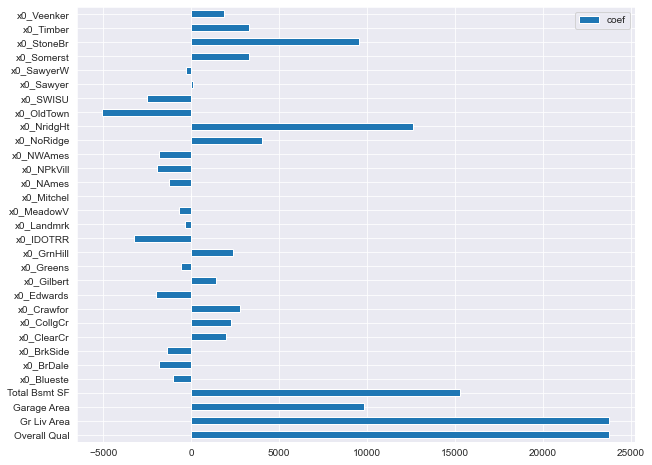

In [80]:
## Make a bar chart to visualize coefficients
# maybe scale data before doing lr so all data is on same scale.
coef_df.plot(kind='barh', figsize= (10,8));

In [127]:
# Normalizing the coefficients allows for better comparison on how the coefficients effect SalePrice. Rather than reading the units effect to why it because std from the price.
# Because we scaled the data we do not need to normalize the coefficients. We now have a better comparison on how the coefficients effect SalePrice.

## Make Predictions

In [82]:
## First we subset `df_test_full` to just the features we included in our model
# submitting all rows:, only feature columns model was trained on
X_kaggle = df_test_full.loc[:,features]

## Then we use the same model to predict on the test data, and save predictions to a `SalePrice` column
X_kaggle['SalePrice'] = lr.predict(X_kaggle)
X_kaggle.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,...,x0_NridgHt,x0_OldTown,x0_SWISU,x0_Sawyer,x0_SawyerW,x0_Somerst,x0_StoneBr,x0_Timber,x0_Veenker,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,6,1928,440,1020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.605198e+07
2718,5,1967,580,1967,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.278975e+07
2414,7,1496,426,654,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.008531e+07
1989,5,968,480,968,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.279866e+07
625,6,1394,514,1394,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.979247e+07


In [84]:
## Set output to be a dataframe with only the `SalePrice` column
output = X_kaggle[['SalePrice']]

In [3]:
output.to_csv("./datasets/fourth_submission.csv")
# 59871876.40391 RMSE on kaggle - did worse on the scaled data!

NameError: name 'output' is not defined

In [86]:
output.shape

(878, 1)

In [87]:
X.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF',
       'x0_Blueste', 'x0_BrDale', 'x0_BrkSide', 'x0_ClearCr', 'x0_CollgCr',
       'x0_Crawfor', 'x0_Edwards', 'x0_Gilbert', 'x0_Greens', 'x0_GrnHill',
       'x0_IDOTRR', 'x0_Landmrk', 'x0_MeadowV', 'x0_Mitchel', 'x0_NAmes',
       'x0_NPkVill', 'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt', 'x0_OldTown',
       'x0_SWISU', 'x0_Sawyer', 'x0_SawyerW', 'x0_Somerst', 'x0_StoneBr',
       'x0_Timber', 'x0_Veenker'],
      dtype='object')